# Telecom Churn Case Study

Submitted by
- Mansi Gupta
- Parijaat Sunil
- Venkata Rama Krishna Kuruva

## 1. Initializing Python Libraries

In [154]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# importing machine learning libraries and methods
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE, RFECV
from sklearn.decomposition import PCA, IncrementalPCA

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, classification_report

In [2]:
# Setting pandas to display maximum number of columns
pd.set_option('display.max_columns', None)

## 2. Importing and analyzing the dataframe

In [3]:
# Importing the Telecom Churn data file into a pandas dataframe
data = pd.read_csv("telecom_churn_data.csv")


In [4]:
# Checking the top 5 rows of the dataframe
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# Checking the shape of the dataframe
data.shape

(99999, 226)

In [6]:
# Checking info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


Inferences:
- There are a 226 columns and 99999 rows in the data

## 3. Cleaning the dataframe

### a. Dropping columns with unique identifiers and single values

In [7]:
# Creating a list of all columns with unique identifiers and single values in the dataframe
uniq_cols = [x for x in data.columns if data[x].nunique() in (99999,1)]
uniq_cols

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [8]:
# Dropping the columsn in the above list
data.drop(uniq_cols, axis =1, inplace=True)
data.shape

(99999, 209)

The columns with unique and single values have been dropped

### b. Dropping columns with a high number of missing values

In [9]:
# Finding the percentage of missing data in the dataframe
null_p = data.isnull().sum() / len(data) * 100
null_p

arpu_6         0.000000
arpu_7         0.000000
arpu_8         0.000000
arpu_9         0.000000
onnet_mou_6    3.937039
                 ...   
aon            0.000000
aug_vbc_3g     0.000000
jul_vbc_3g     0.000000
jun_vbc_3g     0.000000
sep_vbc_3g     0.000000
Length: 209, dtype: float64

We can drop columns with more than 40% missing data

In [10]:
# Finding columns with more than 40% missin data
drop_null_p = null_p[null_p>40]
drop_null_p

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

In [11]:
# Finding the total number of columns with more than 40% missing data
len(drop_null_p)

40

We see a total of 40 columns having more than 40% missing data. We can drop these columns from our dataframe.

In [12]:
# Dropping columns with more than 40% missing data
data.drop(drop_null_p.index, axis = 1, inplace = True)

In [13]:
# Checking the info of the dataframe after dropping columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 169 entries, arpu_6 to sep_vbc_3g
dtypes: float64(132), int64(33), object(4)
memory usage: 128.9+ MB


In [14]:
# Checking the remaining columns
data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0

### c. Handling columns with date values

We can drop columns with date values as we will capture churn based on already available columns from September month data

In [15]:
# Finding all columns with data data
date_col = [col for col in data.columns if 'date' in col]
date_col

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [16]:
# Dropping all columns containing date values
data.drop(date_col, axis = 1, inplace = True)
data.shape

(99999, 165)

### d. Dropping all rows with duplicate data

In [17]:
# Dropping rows with duplicate data
data.drop_duplicates()
data.shape

(99999, 165)

There were no duplicate rows in the data

### e. Finding the high value customers and dropping other rows

As per problem statement, the high value customers are defined as the top 70 percentile of customers by recharge amounts in June and July months

In [18]:
# Creating a new column to find mean of recharge amounts in June and July
data['total_rchg_6_7'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2
data['total_rchg_6_7']

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: total_rchg_6_7, Length: 99999, dtype: float64

In [19]:
# Calculating the 70th percentile of this newly added column
percentile_70 = np.percentile(data['total_rchg_6_7'],70)
percentile_70

368.5

In [20]:
# Finding the high value customers
data['high_value_customer'] = data['total_rchg_6_7'][data['total_rchg_6_7'] >= percentile_70]
data['high_value_customer'].unique()

array([   nan, 1185. ,  519. , ..., 3925. , 2915.5, 1878. ])

In [21]:
# Finding the subset of non null values from high_value_customer column
data_df = data.dropna(subset = ['high_value_customer'])
data_df.shape

(30011, 167)

In [22]:
# Dropping the created column for recharge amount in June and July
data_df.drop('total_rchg_6_7', axis = 1, inplace = True)
data_df.drop('high_value_customer', axis = 1, inplace = True)

In [23]:
data_df.shape

(30011, 165)

We now have our dataset with high value customers only

### f. Creating the churn column and dropping columns for September

In [24]:
# Creating a custom function to check if incoming or outgoing for September is 0
def compare_for_churn(df):
    if (df['total_og_mou_9'] == 0 and df['total_ic_mou_9'] == 0) and (df['vol_2g_mb_9']==0 and df['vol_3g_mb_9']==0):
        return 1
    else:
        return 0

# Applying the function to our dataframe
data_df['churn'] = data_df.apply(compare_for_churn, axis = 1)
data_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,

In [25]:
# Creating a list of all columns with data for September
col_9 = [col for col in data_df.columns if ('_9' in col) or ('sep' in col)]
col_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'sep_vbc_3g']

In [26]:
# Dropping all columns with data from September
data_df.drop(col_9, axis=1, inplace=True)

In [27]:
data_df.shape

(30011, 125)

In [28]:
# Checking the data imbalance
data_df['churn'].value_counts(normalize = True)*100

churn
0    91.359835
1     8.640165
Name: proportion, dtype: float64

There is a large data imbalance in the dataset with only 8.6% of customers who have churned. We need to handle this imbalance

### g. Assessing other columns with missing values

In [29]:
# Checking the null percentage for columns with any missing values
null_p = data_df.isnull().sum() / len(data) * 100
null_p[null_p>0].sort_values(ascending=False)

ic_others_8         0.938009
loc_og_t2m_mou_8    0.938009
std_og_mou_8        0.938009
spl_og_mou_8        0.938009
std_og_t2f_mou_8    0.938009
                      ...   
std_og_t2f_mou_7    0.303003
og_others_7         0.303003
std_og_mou_7        0.303003
spl_og_mou_7        0.303003
isd_og_mou_7        0.303003
Length: 81, dtype: float64

In [30]:
# Checking the null values where churn is 1
null_ch = data_df[data_df.churn==1].isnull().sum() / len(data) * 100
null_ch[null_ch>0].sort_values(ascending=False)

ic_others_8         0.736007
loc_og_t2m_mou_8    0.736007
std_og_mou_8        0.736007
spl_og_mou_8        0.736007
std_og_t2f_mou_8    0.736007
                      ...   
loc_ic_t2t_mou_6    0.106001
std_og_mou_6        0.106001
og_others_6         0.106001
isd_og_mou_6        0.106001
onnet_mou_6         0.106001
Length: 81, dtype: float64

As we cannot lose any columns with churn as 1, we can fill the above missing values by 0

In [31]:
# Filling all missing values with 0 where churn is 1

data_df.loc[data_df.churn==1,:]=data_df.loc[data_df.churn==1,:].fillna(0)

# Checking the null values where churn is 1 again
null_ch = data_df[data_df.churn==1].isnull().sum() / len(data) * 100
null_ch[null_ch>0].sort_values(ascending=False)

Series([], dtype: float64)

In [32]:
# Checking the null percentage for columns with any missing values again
null_p = data_df.isnull().sum() / len(data) * 100
null_p[null_p>0].sort_values(ascending=False)

onnet_mou_6         0.210002
std_ic_t2m_mou_6    0.210002
spl_og_mou_6        0.210002
std_og_mou_6        0.210002
og_others_6         0.210002
                      ...   
std_og_t2f_mou_7    0.144001
og_others_7         0.144001
std_og_mou_7        0.144001
spl_og_mou_7        0.144001
isd_og_mou_7        0.144001
Length: 81, dtype: float64

We can drop these rows as they are a very small fraction of the data, and this will also reduce imbalance

In [33]:
# Droppng remaining rows with missing values
data_df.dropna(inplace=True)

In [34]:
# Checking the null percentage for columns with any missing values again
null_p = data_df.isnull().sum() / len(data) * 100
null_p[null_p>0].sort_values(ascending=False)

Series([], dtype: float64)

In [35]:
data_df.shape

(29647, 125)

In [36]:
# Checking the data imbalance again
data_df['churn'].value_counts(normalize = True)*100

churn
0    91.253752
1     8.746248
Name: proportion, dtype: float64

### h. Dropping total columns for incoming, outgoing

If we analyze the data, we see that the total columns for example loc_og_mou, std_og_mou, total_og_mou, loc_ic_mou_6 etc. are not always correct. There are several places where the sum is wrong. We can drop these columns and create new total columns as derived variables


In [37]:
# Creating a list of all columns with total values
total_cols = ['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','total_og_mou_6','total_og_mou_7',
             'total_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6',
             'total_ic_mou_7','total_ic_mou_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']

# Dropping the above columns
data_df.drop(total_cols, axis=1, inplace=True)
data_df.shape

(29647, 101)

In [38]:
data_df.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0
13,492.846,205.671,593.260,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0
16,430.975,299.869,187.894,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0
17,690.008,18.980,25.499,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,34.54,0.00,0.00,47.41,2.31,0.00,0.00,0.00,0.00,8.63,0.00,0.00,1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,2,4,816,0,30,110,0,30,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0


## 4. Creating derived variables

We can now create the total rows for incoming and outgoing MOU categories. We will keep the T2C columns without adding them to the total rows as we expect to see higher calls to call centres in case of churn.

### a. Outgoing MOU for each month

In [39]:
# Creating a list of all columns to be added for each month except T2C Columns
og_mou_6 = ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','isd_og_mou_6',
            'spl_og_mou_6','og_others_6']

og_mou_7 = ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','isd_og_mou_7',
            'spl_og_mou_7','og_others_7']

og_mou_8 = ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','isd_og_mou_8',
            'spl_og_mou_8','og_others_8']

# Creating a new sum columns for each month
data_df['total_og_mou_6']=data_df[og_mou_6].sum(axis=1)
data_df['total_og_mou_7']=data_df[og_mou_7].sum(axis=1)
data_df['total_og_mou_8']=data_df[og_mou_8].sum(axis=1)
data_df.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,total_og_mou_6,total_og_mou_7,total_og_mou_8
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,487.50,609.21,350.13
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0,508.34,431.64,171.53
13,492.846,205.671,593.260,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0,907.07,192.39,1015.22
16,430.975,299.869,187.894,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0,346.78,285.98,233.35
17,690.008,18.980,25.499,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,34.54,0.00,0.00,47.41,2.31,0.00,0.00,0.00,0.00,8.63,0.00,0.00,1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,2,4,816,0,30,110,0,30,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.0

In [40]:
# Dropping the outgoing columns
data_df.drop(og_mou_6, axis=1, inplace=True)
data_df.drop(og_mou_7, axis=1, inplace=True)
data_df.drop(og_mou_8, axis=1, inplace=True)
data_df.shape

(29647, 77)

### b. Incoming MOU for each month

In [41]:
# Creating a list of all columns to be added for each month
ic_mou_6 = ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','spl_ic_mou_6',
            'isd_ic_mou_6','ic_others_6']

ic_mou_7 = ['loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','spl_ic_mou_7',
            'isd_ic_mou_7','ic_others_7']

ic_mou_8 = ['loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','spl_ic_mou_8',
            'isd_ic_mou_8','ic_others_8']

# Creating a new sum columns for each month
data_df['total_ic_mou_6']=data_df[ic_mou_6].sum(axis=1)
data_df['total_ic_mou_7']=data_df[ic_mou_7].sum(axis=1)
data_df['total_ic_mou_8']=data_df[ic_mou_8].sum(axis=1)
data_df.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,487.50,609.21,350.13,626.39,557.99,428.69
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0,508.34,431.64,171.53,103.85,28.48,16.54
13,492.846,205.671,593.260,23.53,144.24,72.11,7.98,35.26,1.44,0.0,0.0,0.49,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0,907.07,192.39,1015.22,968.59,172.54,1144.48
16,430.975,299.869,187.894,0.00,2.83,0.00,0.00,17.74,0.00,0.0,0.0,0.00,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0,346.78,285.98,233.35,364.83,381.53,294.43
17,690.008,18.980,25.499,0.00,4.76,4.81,0.00,8.46,13.34,0.0,0.0,0.00,34.54,0.00,0.00,47.41,2.31,0.00,0.00,0.00,0.00,8.63,0.00,0.00,1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,2,4,816,0,30,110,0,30,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0,1249.50,0.81,0.00,91.86,2.31,0.00


In [42]:
# Dropping the outgoing columns
data_df.drop(ic_mou_6, axis=1, inplace=True)
data_df.drop(ic_mou_7, axis=1, inplace=True)
data_df.drop(ic_mou_8, axis=1, inplace=True)
data_df.shape

(29647, 53)

### c. Creating combined data columns

In [43]:
# Adding the respective variables for 2G and 3G columns
data_df['data_6']=data_df.vol_2g_mb_6 + data_df.vol_3g_mb_6
data_df['data_7']=data_df.vol_2g_mb_7 + data_df.vol_3g_mb_7
data_df['data_8']=data_df.vol_2g_mb_8 + data_df.vol_3g_mb_8
data_df['monthly_6']=data_df.monthly_2g_6 + data_df.monthly_3g_6
data_df['monthly_7']=data_df.monthly_2g_7 + data_df.monthly_3g_7
data_df['monthly_8']=data_df.monthly_2g_8 + data_df.monthly_3g_8
data_df['sachet_6']=data_df.sachet_2g_6 + data_df.sachet_3g_6
data_df['sachet_7']=data_df.sachet_2g_7 + data_df.sachet_3g_7
data_df['sachet_8']=data_df.sachet_2g_8 + data_df.sachet_3g_8

# Dropping the 2G & 3G columns
data_df.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','monthly_2g_6','monthly_2g_7',
              'monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8'], axis=1, inplace=True)

In [44]:
data_df.shape

(29647, 44)

### d. Creating variables to store the average values of good phase (June and July)

In [45]:
# creating column to store average arpu for 6 & 7 and dropping individual cols
data_df['arpu_avg_good'] = (data_df.arpu_6 + data_df.arpu_7)/2
data_df.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

# creating column to store average roaming mou for 6 & 7 and dropping individual cols
data_df['roam_ic_avg_good'] = (data_df.roam_ic_mou_6 + data_df.roam_ic_mou_7)/2
data_df['roam_og_avg_good'] = (data_df.roam_og_mou_6 + data_df.roam_og_mou_7)/2
data_df.drop(['roam_og_mou_6','roam_og_mou_7','roam_ic_mou_6','roam_ic_mou_7'], axis=1, inplace=True)

# creating column to store average T2C mou for 6 & 7 and dropping individual cols
data_df['T2C_avg_good'] = (data_df.loc_og_t2c_mou_6 + data_df.loc_og_t2c_mou_7)/2
data_df.drop(['loc_og_t2c_mou_6','loc_og_t2c_mou_7'], axis=1, inplace=True)

# creating column to store average rech num for 6 & 7 and dropping individual cols
data_df['rech_num_avg_good'] = (data_df.total_rech_num_6 + data_df.total_rech_num_7)/2
data_df.drop(['total_rech_num_6','total_rech_num_7'], axis=1, inplace=True)

# creating column to store average rech amt for 6 & 7 and dropping individual cols
data_df['total_rech_amt_avg_good'] = (data_df.total_rech_amt_6 + data_df.total_rech_amt_7)/2
data_df.drop(['total_rech_amt_6','total_rech_amt_7'], axis=1, inplace=True)

# creating column to store average max rech amt for 6 & 7 and dropping individual cols
data_df['max_rech_amt_avg_good'] = (data_df.max_rech_amt_6 + data_df.max_rech_amt_7)/2
data_df.drop(['max_rech_amt_6','max_rech_amt_7'], axis=1, inplace=True)

# creating column to store average last day rech amt for 6 & 7 and dropping individual cols
data_df['last_rech_amt_avg_good'] = (data_df.last_day_rch_amt_6 + data_df.last_day_rch_amt_7)/2
data_df.drop(['last_day_rch_amt_6','last_day_rch_amt_7'], axis=1, inplace=True)

# creating column to store average data volume for 6 & 7 and dropping individual cols
data_df['data_avg_good'] = (data_df.data_6 + data_df.data_7)/2
data_df.drop(['data_6','data_7'], axis=1, inplace=True)

# creating column to store average monthly data for 6 & 7 and dropping individual cols
data_df['monthly_avg_good'] = (data_df.monthly_6 + data_df.monthly_7)/2
data_df.drop(['monthly_6','monthly_7'], axis=1, inplace=True)

# creating column to store average sachet data for 6 & 7 and dropping individual cols
data_df['sachet_avg_good'] = (data_df.sachet_6 + data_df.sachet_7)/2
data_df.drop(['sachet_6','sachet_7'], axis=1, inplace=True)

# creating column to store average VBC for 6 & 7 and dropping individual cols
data_df['vbc_avg_good'] = (data_df.jun_vbc_3g + data_df.jul_vbc_3g)/2
data_df.drop(['jun_vbc_3g','jul_vbc_3g'], axis=1, inplace=True)

# creating column to store average outgoing mou for 6 & 7 and dropping individual cols
data_df['og_mou_avg_good'] = (data_df.total_og_mou_6 + data_df.total_og_mou_7)/2
data_df.drop(['total_og_mou_6','total_og_mou_7'], axis=1, inplace=True)

# creating column to store average incoming mou for 6 & 7 and dropping individual cols
data_df['ic_mou_avg_good'] = (data_df.total_ic_mou_6 + data_df.total_ic_mou_7)/2
data_df.drop(['total_ic_mou_6','total_ic_mou_7'], axis=1, inplace=True)

# Checking the dataframe head
data_df.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,aon,aug_vbc_3g,churn,total_og_mou_8,total_ic_mou_8,data_8,monthly_8,sachet_8,arpu_avg_good,roam_ic_avg_good,roam_og_avg_good,T2C_avg_good,rech_num_avg_good,total_rech_amt_avg_good,max_rech_amt_avg_good,last_rech_amt_avg_good,data_avg_good,monthly_avg_good,sachet_avg_good,vbc_avg_good,og_mou_avg_good,ic_mou_avg_good
7,3171.480,31.64,38.06,0.00,7,3638,1580,779,802,57.74,1,350.13,428.69,0.00,0,0,1209.5150,24.860,18.165,0.0,5.0,1185.0,1185.0,0.0,0.000,0.0,0.0,19.060,548.355,592.190
8,137.362,0.00,0.00,7.15,14,120,30,10,315,21.03,0,171.53,16.54,11.97,0,3,435.4720,0.000,0.000,0.0,20.0,519.0,122.0,25.0,553.475,0.5,0.5,516.405,469.990,66.165
13,593.260,72.11,1.44,0.49,11,717,130,0,2607,0.00,0,1015.22,1144.48,0.02,0,3,349.2585,83.885,21.620,0.0,5.0,380.0,110.0,80.0,0.000,0.0,0.0,0.000,549.730,570.565
16,187.894,0.00,0.00,0.00,2,160,130,130,511,0.00,0,233.35,294.43,0.00,0,0,365.4220,1.415,8.870,0.0,8.0,459.0,110.0,100.0,0.000,0.0,0.0,12.170,316.380,373.180
17,25.499,4.81,13.34,0.00,4,30,30,0,667,0.00,0,0.00,0.00,0.00,0,0,354.4940,2.380,4.230,0.0,10.5,408.0,55.0,15.0,0.000,0.0,0.0,0.000,625.155,47.085


In [46]:
data_df.shape

(29647, 30)

### d. Creating variables for checking changes from good to action phase

We now have to create variables to check if each of the factors have increased or decreased from the good to action phase

In [47]:
# Creating the variable to check how the variables have changed from the good to action phase considering the below
# 1: same or increased
# 2: decreased

# arpu
data_df['arpu_flag'] = data_df.apply(lambda x: 1 if x.arpu_8 >= x.arpu_avg_good	else 0, axis=1)

# roaming incoming
data_df['roam_ic_flag'] = data_df.apply(lambda x: 1 if x.roam_ic_mou_8 >= x.roam_ic_avg_good	else 0, axis=1)

# roaming outgoing
data_df['roam_og_flag'] = data_df.apply(lambda x: 1 if x.roam_og_mou_8 >= x.roam_og_avg_good	else 0, axis=1)

# T2C
data_df['t2c_flag'] = data_df.apply(lambda x: 1 if x.loc_og_t2c_mou_8 >= x.T2C_avg_good	else 0, axis=1)

# Total Recharge Number
data_df['rech_num_flag'] = data_df.apply(lambda x: 1 if x.total_rech_num_8 >= x.rech_num_avg_good	else 0, axis=1)

# Total Recharge amount
data_df['total_rech_amt_flag'] = data_df.apply(lambda x: 1 if x.total_rech_amt_8 >= x.total_rech_amt_avg_good	else 0, axis=1)

# Maximum Recharge amount
data_df['max_rech_amt_flag'] = data_df.apply(lambda x: 1 if x.max_rech_amt_8 >= x.max_rech_amt_avg_good	else 0, axis=1)

# Last day Recharge amount
data_df['last_rech_amt_flag'] = data_df.apply(lambda x: 1 if x.last_day_rch_amt_8 >= x.last_rech_amt_avg_good else 0, axis=1)

# Total outgoing mou
data_df['og_mou_flag'] = data_df.apply(lambda x: 1 if x.total_og_mou_8 >= x.og_mou_avg_good else 0, axis=1)

# Total incoming mou
data_df['ic_mou_flag'] = data_df.apply(lambda x: 1 if x.total_ic_mou_8 >= x.ic_mou_avg_good else 0, axis=1)

# Total data
data_df['data_flag'] = data_df.apply(lambda x: 1 if x.data_8 >= x.data_avg_good else 0, axis=1)

# Total monthly
data_df['monthly_flag'] = data_df.apply(lambda x: 1 if x.monthly_8 >= x.monthly_avg_good else 0, axis=1)

# Total sachet
data_df['sachet_flag'] = data_df.apply(lambda x: 1 if x.sachet_8 >= x.sachet_avg_good else 0, axis=1)

# Total VBC
data_df['vbc_flag'] = data_df.apply(lambda x: 1 if x.aug_vbc_3g >= x.vbc_avg_good else 0, axis=1)

data_df.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,aon,aug_vbc_3g,churn,total_og_mou_8,total_ic_mou_8,data_8,monthly_8,sachet_8,arpu_avg_good,roam_ic_avg_good,roam_og_avg_good,T2C_avg_good,rech_num_avg_good,total_rech_amt_avg_good,max_rech_amt_avg_good,last_rech_amt_avg_good,data_avg_good,monthly_avg_good,sachet_avg_good,vbc_avg_good,og_mou_avg_good,ic_mou_avg_good,arpu_flag,roam_ic_flag,roam_og_flag,t2c_flag,rech_num_flag,total_rech_amt_flag,max_rech_amt_flag,last_rech_amt_flag,og_mou_flag,ic_mou_flag,data_flag,monthly_flag,sachet_flag,vbc_flag
7,3171.480,31.64,38.06,0.00,7,3638,1580,779,802,57.74,1,350.13,428.69,0.00,0,0,1209.5150,24.860,18.165,0.0,5.0,1185.0,1185.0,0.0,0.000,0.0,0.0,19.060,548.355,592.190,1,1,1,1,1,1,1,1,0,0,1,1,1,1
8,137.362,0.00,0.00,7.15,14,120,30,10,315,21.03,0,171.53,16.54,11.97,0,3,435.4720,0.000,0.000,0.0,20.0,519.0,122.0,25.0,553.475,0.5,0.5,516.405,469.990,66.165,0,1,1,1,0,0,0,0,0,0,0,0,1,0
13,593.260,72.11,1.44,0.49,11,717,130,0,2607,0.00,0,1015.22,1144.48,0.02,0,3,349.2585,83.885,21.620,0.0,5.0,380.0,110.0,80.0,0.000,0.0,0.0,0.000,549.730,570.565,1,0,0,1,1,1,1,0,1,1,1,1,1,1
16,187.894,0.00,0.00,0.00,2,160,130,130,511,0.00,0,233.35,294.43,0.00,0,0,365.4220,1.415,8.870,0.0,8.0,459.0,110.0,100.0,0.000,0.0,0.0,12.170,316.380,373.180,0,0,0,1,0,0,1,1,0,0,1,1,1,0
17,25.499,4.81,13.34,0.00,4,30,30,0,667,0.00,0,0.00,0.00,0.00,0,0,354.4940,2.380,4.230,0.0,10.5,408.0,55.0,15.0,0.000,0.0,0.0,0.000,625.155,47.085,0,1,1,1,0,0,0,0,0,0,1,1,1,1


In [48]:
data_df.shape

(29647, 44)

In [49]:
data_df.describe

<bound method NDFrame.describe of          arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  \
7      3171.480          31.64          38.06              0.00   
8       137.362           0.00           0.00              7.15   
13      593.260          72.11           1.44              0.49   
16      187.894           0.00           0.00              0.00   
17       25.499           4.81          13.34              0.00   
...         ...            ...            ...               ...   
99970   290.851           0.00           0.00             20.85   
99974   371.016           0.00           0.00              0.13   
99986   564.334           0.00           0.00              9.15   
99988   402.080           0.00           0.00              0.01   
99997   606.817           0.00           0.00              0.00   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
7                     7              3638            1580                 779   

# EDA to understand more on correlated variables

From below we see that customers who have been on network for less than 800 days are more likely to churn

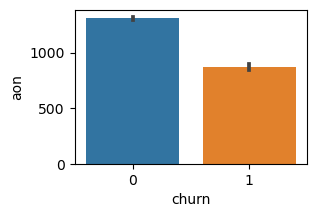

In [50]:
plt.figure(figsize = (3,2))
sns.barplot(x = 'churn', y = 'aon', data = data_df)
plt.show()

Below are a comparison of churn with all the flag columns created to differentiate parameters which are strongest indicators of churn.

ARPU , NUmber of Recharges done, total recharge amount, outgoing MOU, incoming MOU are some columns where we see people who have left have decreased there usage on these parameters than others who are still on network.

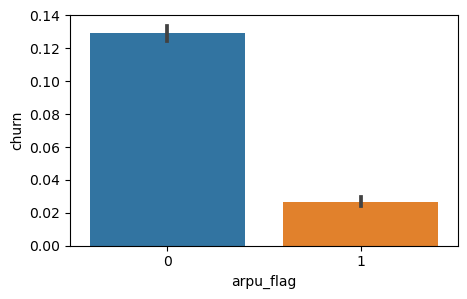

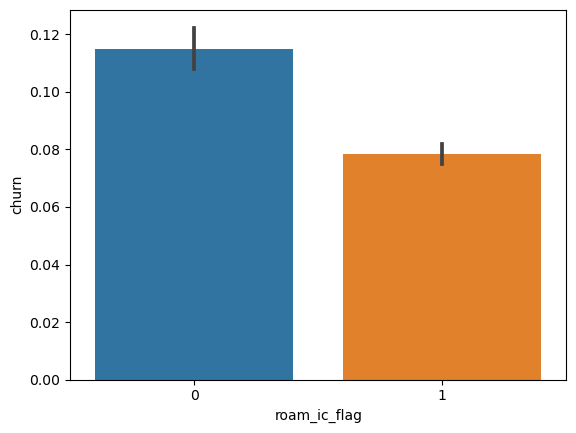

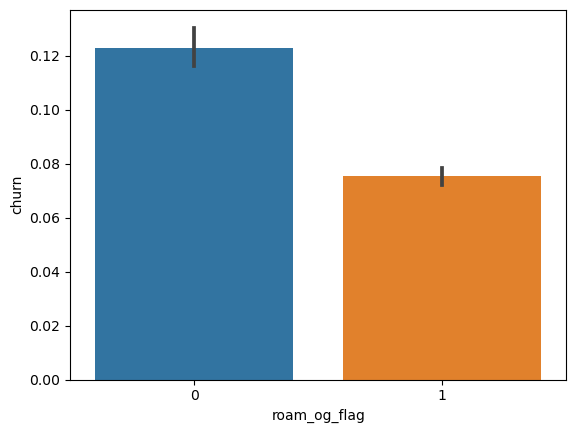

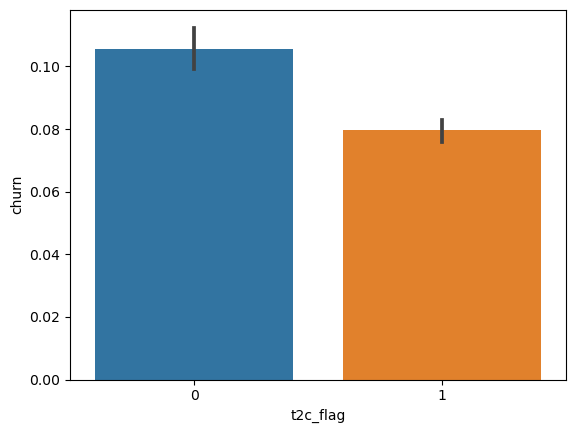

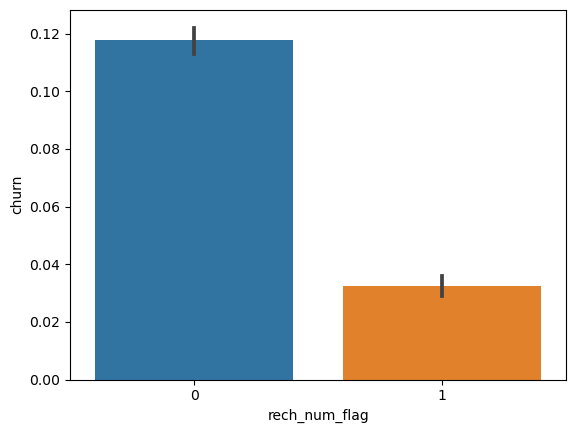

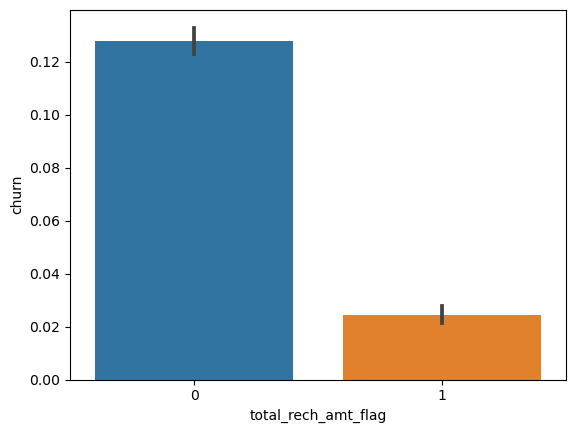

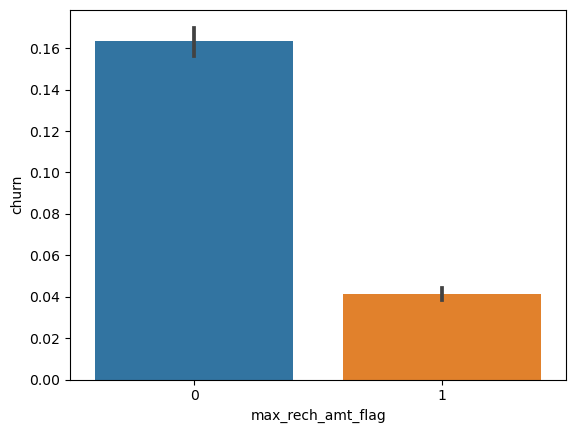

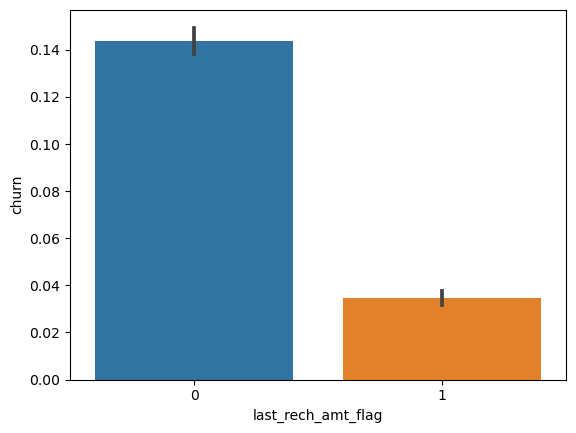

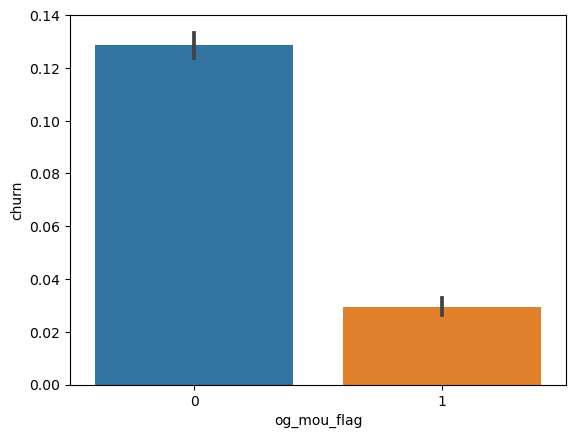

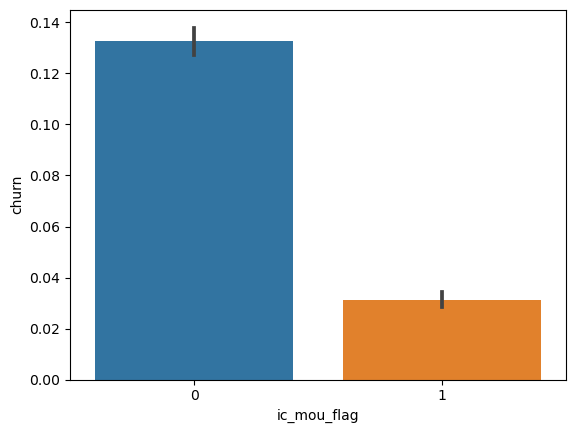

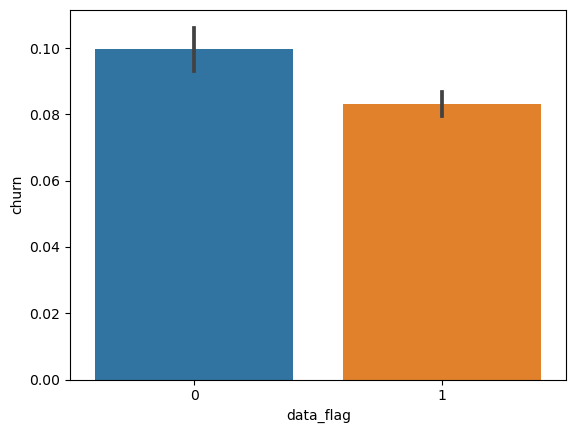

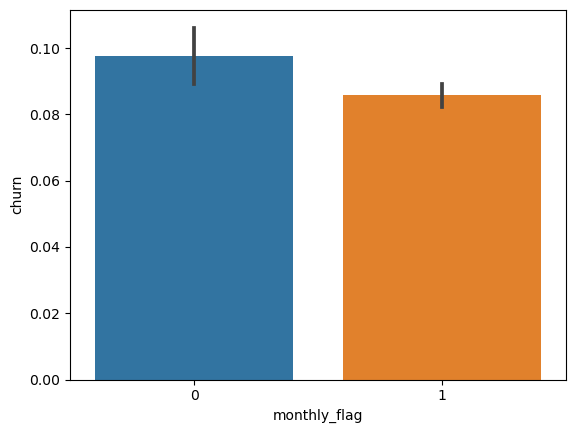

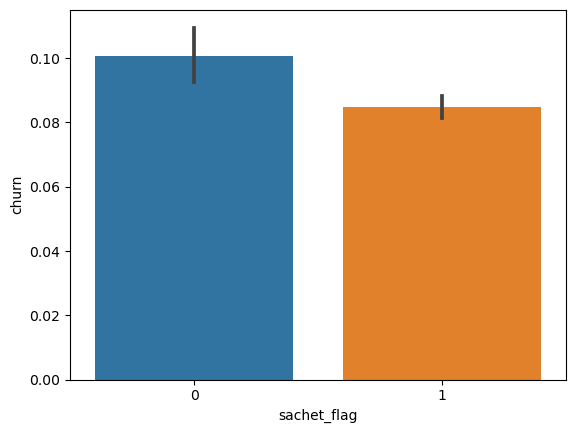

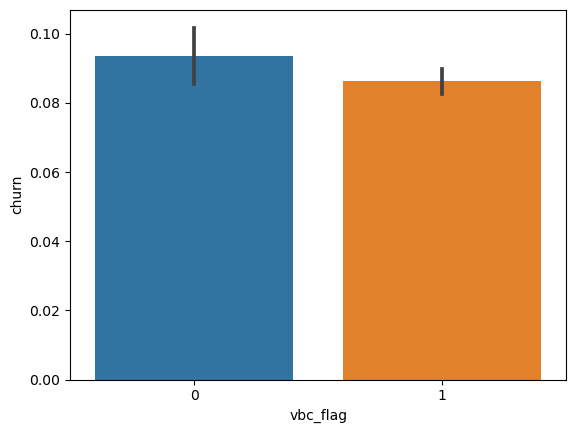

In [51]:
flag_cols = [col for col in data_df.columns if 'flag' in col]
plt.figure(figsize = (5,3))
for colm in flag_cols:
    sns.barplot(x = data_df[colm], y = data_df['churn'])
    plt.show()

Below graph shows if the amount of minutes spent in talking to customer care is reduced in action phase, those people are likely to churn.

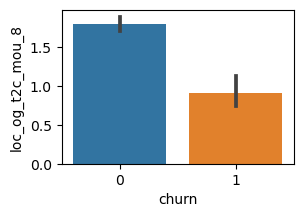

In [52]:
plt.figure(figsize = (3,2))
sns.barplot(x = 'churn', y = 'loc_og_t2c_mou_8', data = data_df)
plt.show()

From Below 2 scatterplots, we see that the there is a significant decrease in roaming incoming and outing calls from good phase to action phase for people who churn.

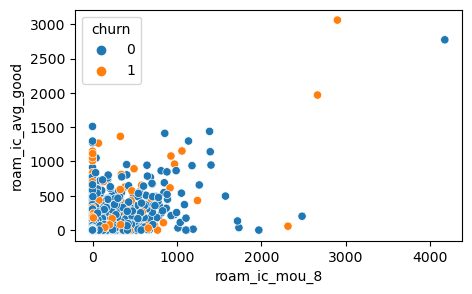

In [53]:
plt.figure(figsize = (5,3))
sns.scatterplot(y = 'roam_ic_avg_good', x = 'roam_ic_mou_8', data = data_df, hue = 'churn')
plt.show()

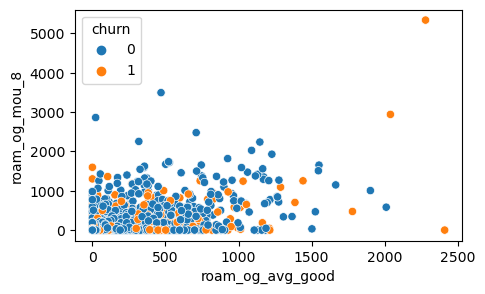

In [54]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'roam_og_avg_good', y = 'roam_og_mou_8', data = data_df, hue = 'churn')
plt.show()

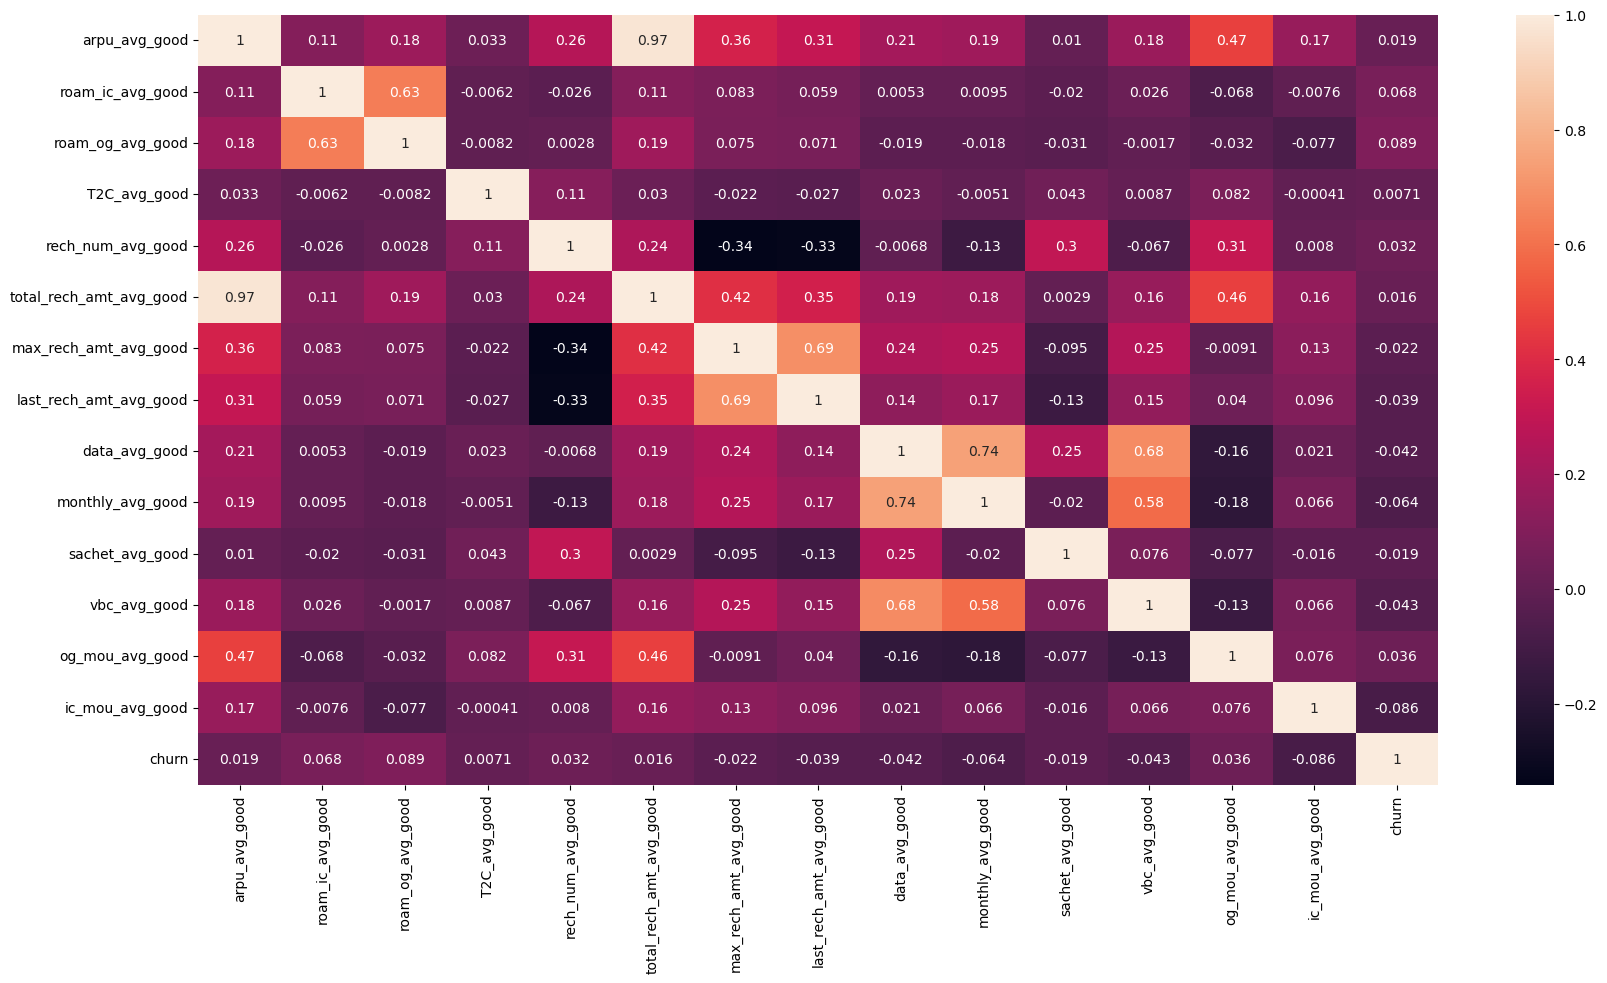

In [55]:
roam_cols = [col for col in data_df.columns if 'avg_good' in col]
roam_cols.append('churn')
plt.figure(figsize=(20,10))
sns.heatmap(data_df[roam_cols].corr(), annot=True)
plt.show()

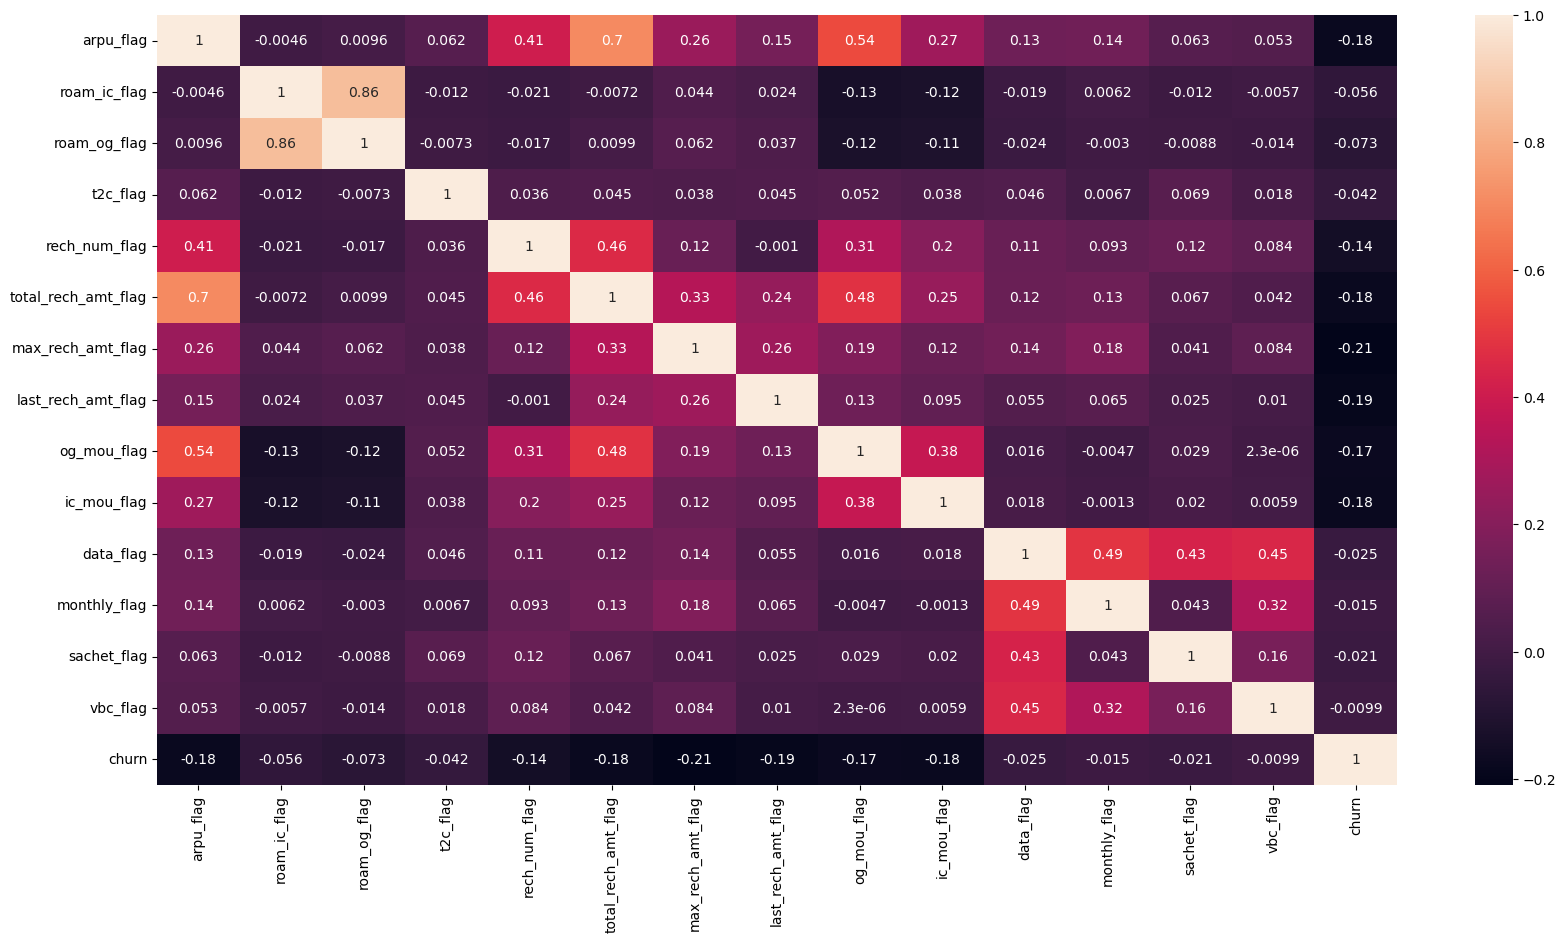

In [56]:
roam_cols = [col for col in data_df.columns if ('flag' in col)]
roam_cols.append('churn')
plt.figure(figsize=(20,10))
sns.heatmap(data_df[roam_cols].corr(), annot=True)
plt.show()

## Dealing with data imbalance

In [57]:
X = data_df.drop('churn', axis = 1)
y = data_df['churn']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [59]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [60]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [61]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

## Feature Scaling

In [62]:
# Instantiate the Scaler
scaler = StandardScaler()

In [63]:
avg_flag_col = [col for col in data_df.columns if '_flag' not in col]
avg_flag_col

['arpu_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2c_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'aon',
 'aug_vbc_3g',
 'churn',
 'total_og_mou_8',
 'total_ic_mou_8',
 'data_8',
 'monthly_8',
 'sachet_8',
 'arpu_avg_good',
 'roam_ic_avg_good',
 'roam_og_avg_good',
 'T2C_avg_good',
 'rech_num_avg_good',
 'total_rech_amt_avg_good',
 'max_rech_amt_avg_good',
 'last_rech_amt_avg_good',
 'data_avg_good',
 'monthly_avg_good',
 'sachet_avg_good',
 'vbc_avg_good',
 'og_mou_avg_good',
 'ic_mou_avg_good']

In [64]:
avg_flag_col.remove('churn')
avg_flag_col

['arpu_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2c_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'aon',
 'aug_vbc_3g',
 'total_og_mou_8',
 'total_ic_mou_8',
 'data_8',
 'monthly_8',
 'sachet_8',
 'arpu_avg_good',
 'roam_ic_avg_good',
 'roam_og_avg_good',
 'T2C_avg_good',
 'rech_num_avg_good',
 'total_rech_amt_avg_good',
 'max_rech_amt_avg_good',
 'last_rech_amt_avg_good',
 'data_avg_good',
 'monthly_avg_good',
 'sachet_avg_good',
 'vbc_avg_good',
 'og_mou_avg_good',
 'ic_mou_avg_good']

In [65]:
# Fit the data into scaler and transform
X_train[avg_flag_col] = scaler.fit_transform(X_train[avg_flag_col])

In [66]:
X_train.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,aon,aug_vbc_3g,total_og_mou_8,total_ic_mou_8,data_8,monthly_8,sachet_8,arpu_avg_good,roam_ic_avg_good,roam_og_avg_good,T2C_avg_good,rech_num_avg_good,total_rech_amt_avg_good,max_rech_amt_avg_good,last_rech_amt_avg_good,data_avg_good,monthly_avg_good,sachet_avg_good,vbc_avg_good,og_mou_avg_good,ic_mou_avg_good,arpu_flag,roam_ic_flag,roam_og_flag,t2c_flag,rech_num_flag,total_rech_amt_flag,max_rech_amt_flag,last_rech_amt_flag,og_mou_flag,ic_mou_flag,data_flag,monthly_flag,sachet_flag,vbc_flag
0,-0.845558,-0.209205,-0.184637,-0.229070,-0.570319,-0.791412,-0.764144,-0.531789,-0.698826,-0.261786,-0.705719,-0.635107,-0.288552,-0.313966,0.283011,-0.390656,-0.247926,-0.292137,-0.259304,0.002992,-0.363940,-0.563692,-0.382164,-0.384224,-0.442446,0.438249,-0.318113,0.192412,-0.763568,0,1,1,1,0,0,0,0,0,0,1,1,0,1
1,-0.338296,-0.216953,-0.257081,-0.229070,-0.804987,-0.791412,-0.764144,-0.531789,-0.862545,-0.261786,-0.635227,-0.049437,-0.288552,-0.313966,-0.256947,-1.028558,-0.247926,-0.308956,-0.259304,-1.095470,-0.430623,2.323947,-0.905505,-0.384224,-0.442446,-0.316426,-0.318113,-1.114844,-0.468133,1,1,1,1,0,0,0,1,1,1,1,1,1,1
2,2.834743,-0.216953,-0.257081,-0.138592,-0.452985,1.395842,5.776884,0.012078,1.438425,-0.261786,1.624175,0.951653,-0.288552,-0.313966,-0.256947,3.536967,-0.247926,-0.308956,0.498857,-0.973418,3.361428,9.714928,14.081096,-0.384224,-0.442446,-0.316426,-0.318113,1.705218,0.178659,0,1,1,0,0,0,0,0,0,1,1,1,1,1
3,-0.855754,-0.216953,-0.257081,-0.229070,-0.922320,-0.791412,-0.764144,-0.531789,-0.682120,-0.261786,-0.705719,-0.635107,-0.288552,-0.313966,-0.256947,-0.498758,-0.247926,-0.308956,-0.259304,-0.241110,-0.559544,-0.653072,-0.553439,-0.384224,-0.442446,-0.316426,-0.318113,0.180641,-0.492729,0,1,1,1,0,0,0,0,0,0,1,1,1,1
4,2.098779,-0.216953,-0.257081,-0.156333,1.072355,2.071185,0.164059,0.523475,-0.654277,-0.261786,4.926887,-0.044523,-0.244296,-0.313966,0.283011,0.902114,-0.238538,-0.124873,-0.028267,0.002992,1.036407,-0.233677,0.312453,-0.384224,-0.442446,-0.316426,-0.318113,2.711055,-0.526907,1,0,0,0,1,1,1,1,1,1,1,1,1,1


In [67]:
# Transform the test set
X_test[avg_flag_col] = scaler.transform(X_test[avg_flag_col])
X_test.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,aon,aug_vbc_3g,total_og_mou_8,total_ic_mou_8,data_8,monthly_8,sachet_8,arpu_avg_good,roam_ic_avg_good,roam_og_avg_good,T2C_avg_good,rech_num_avg_good,total_rech_amt_avg_good,max_rech_amt_avg_good,last_rech_amt_avg_good,data_avg_good,monthly_avg_good,sachet_avg_good,vbc_avg_good,og_mou_avg_good,ic_mou_avg_good,arpu_flag,roam_ic_flag,roam_og_flag,t2c_flag,rech_num_flag,total_rech_amt_flag,max_rech_amt_flag,last_rech_amt_flag,og_mou_flag,ic_mou_flag,data_flag,monthly_flag,sachet_flag,vbc_flag
7316,0.155605,-0.216953,-0.257081,-0.229070,-0.335651,0.027241,0.045698,-0.531789,1.383852,-0.261786,0.783042,4.936916,-0.288552,-0.313966,-0.256947,-0.476512,-0.247926,-0.308956,-0.259304,-0.058033,-0.411729,-0.357433,-0.496347,-0.384224,-0.442446,1.444482,-0.318113,0.099880,4.041473,1,1,1,1,0,0,1,0,1,1,1,1,0,1
60182,-0.116479,-0.216953,-0.257081,-0.229070,-0.687653,-0.074867,0.481766,1.091693,0.165429,-0.261786,-0.411334,0.258009,-0.288552,-0.313966,-0.256947,-0.657322,-0.082943,-0.151104,-0.259304,-1.217521,-0.509531,0.605114,1.135527,-0.384224,-0.442446,-0.316426,-0.318113,-0.876595,-0.348457,0,0,0,1,0,0,0,0,1,1,1,1,1,1
99763,-0.804117,-0.195258,-0.207114,-0.229070,-0.687653,-0.791412,-0.764144,-0.531789,-0.257788,-0.261786,-0.697269,-0.621315,-0.288552,-0.313966,-0.256947,-0.631519,0.471684,-0.068031,-0.259304,-1.217521,-0.650678,1.113888,-0.905505,0.222183,0.475067,-0.064867,-0.318113,-0.908130,0.318971,0,0,0,1,0,0,0,1,0,0,0,0,0,1
91624,-0.639570,-0.119324,-0.051080,1.124551,-0.452985,-0.612275,-0.141189,-0.531789,0.710044,-0.261786,-0.630794,-0.589768,-0.288552,-0.313966,-0.256947,-0.372203,-0.247926,-0.308956,1.393846,-0.668290,-0.528425,0.158217,0.188754,-0.384224,-0.442446,-0.316426,-0.318113,0.340782,-0.514304,0,1,1,0,0,0,0,0,0,0,1,1,1,1
11164,0.396821,-0.058370,-0.257081,-0.229070,0.955021,0.371183,0.139141,-0.531789,2.239197,0.169448,-0.009138,0.747530,-0.075287,1.570030,1.362927,0.218250,-0.067843,-0.130697,-0.259304,0.979403,0.157300,-0.384934,-0.620046,-0.062263,0.475067,0.186691,0.359076,-0.294188,1.058511,0,0,0,1,0,0,1,0,0,0,0,1,1,0


# Model with PCA

In [68]:
# Instantiate PCA
pca = PCA(random_state=42)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [69]:
# Principal components
pca.components_

array([[ 3.28158918e-01,  5.07312403e-02,  8.03176380e-02, ...,
        -2.37601117e-02,  6.28132211e-03, -2.80819410e-02],
       [ 2.17999975e-01,  5.65182788e-02,  1.00452696e-01, ...,
         6.55591837e-02,  3.12366092e-02,  6.75259157e-02],
       [-4.19088179e-02,  2.34995383e-01,  2.46136665e-01, ...,
        -3.74070629e-03,  3.32541444e-02, -3.88259178e-03],
       ...,
       [ 2.38155024e-03,  3.02359765e-03, -2.43238784e-03, ...,
        -6.80413490e-01, -2.80560528e-01, -5.01868437e-02],
       [ 3.26065515e-01, -4.00093027e-03, -1.14577363e-04, ...,
        -3.05145757e-02, -1.03495924e-02, -2.74448076e-02],
       [-5.07774480e-01,  3.12247135e-04,  1.36042975e-03, ...,
         1.12398712e-02, -2.93007215e-03, -1.98363240e-02]])

In [70]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.19392242 0.31055274 0.40344868 0.47958144 0.54289471 0.58902231
 0.63387622 0.67622594 0.7039771  0.72961435 0.75313517 0.77587948
 0.79749269 0.81775683 0.83633888 0.85406007 0.87139171 0.88504035
 0.89528656 0.90535202 0.91498502 0.92375163 0.93216749 0.94007327
 0.94643755 0.95270891 0.95878509 0.96432851 0.96935557 0.97372698
 0.97720945 0.98049082 0.9833552  0.98591254 0.98835676 0.99071822
 0.99270273 0.9945744  0.99606023 0.99747903 0.99876728 0.99942652
 1.        ]


Text(0, 0.5, 'Cumulative Variance')

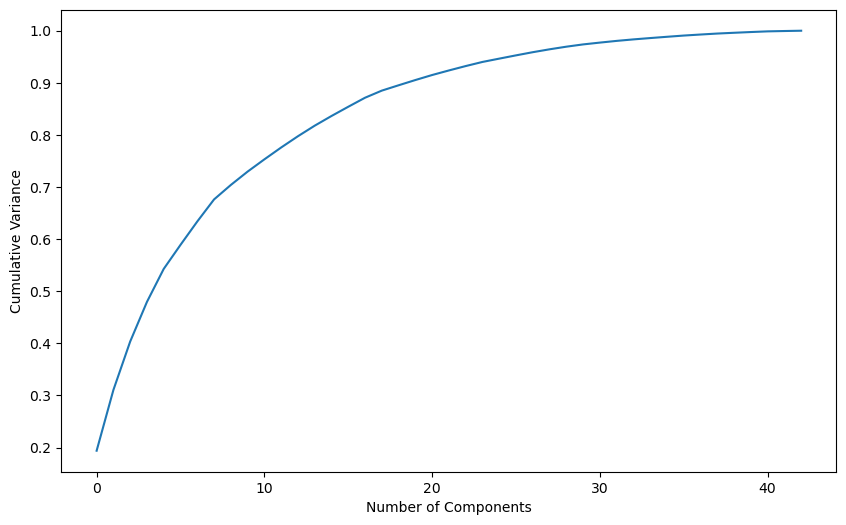

In [71]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

Reduced the number of components slowly from 35 to 23 to get sensitivity score between train and test set in acceptable difference.

In [112]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=23)

# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

Using logistic regression model with GridSearch and PCA

In [113]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [114]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.052429,0.007006,0.006351,0.005535,0.01,{'C': 0.01},0.859226,0.860689,0.861302,0.859004,0.860021,0.860048,0.000866,6,0.860709,0.860872,0.860126,0.859581,0.859654,0.860188,0.000529
1,0.053024,0.004944,0.007078,0.005428,0.1,{'C': 0.1},0.859756,0.859621,0.861567,0.860829,0.861068,0.860568,0.000758,5,0.862026,0.861858,0.860719,0.859713,0.860909,0.861045,0.000839
2,0.046238,0.005248,0.006568,0.008097,1,{'C': 1},0.859756,0.859621,0.862890,0.860047,0.861329,0.860729,0.001239,4,0.862026,0.862187,0.860983,0.860044,0.860843,0.861216,0.000796
3,0.054712,0.013201,0.001917,0.003114,10,{'C': 10},0.859756,0.859621,0.863155,0.860047,0.861329,0.860782,0.001332,3,0.861960,0.862187,0.860983,0.860044,0.860909,0.861217,0.000777
4,0.054512,0.007453,0.007338,0.004960,100,{'C': 100},0.859756,0.859621,0.863155,0.860047,0.861591,0.860834,0.001357,1,0.861960,0.862187,0.860983,0.860044,0.860909,0.861217,0.000777
5,0.049003,0.006931,0.007933,0.005902,1000,{'C': 1000},0.859756,0.859621,0.863155,0.860047,0.861591,0.860834,0.001357,1,0.861960,0.862187,0.860983,0.860044,0.860909,0.861217,0.000777


In [115]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8608339876106816 at C = 100


In [116]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [117]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [118]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [119]:
# Confusion matrix
confusion_train = confusion_matrix(y_train, y_train_pred)
print(confusion_train)

# Confusion matrix
confusion_test = confusion_matrix(y_test, y_test_pred)
print(confusion_test)

[[15610  3346]
 [ 2636 16320]]
[[6659 1439]
 [ 142  655]]


In [120]:
TP_train = confusion_train[1,1] # true positive 
TN_train = confusion_train[0,0] # true negatives
FP_train = confusion_train[0,1] # false positives
FN_train = confusion_train[1,0] # false negatives

TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [121]:
print("Train Set:")
# Accuracy
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP_train / float(TP_train+FN_train))

# Specificity
print("Specificity:-", TN_train / float(TN_train+FP_train))

print("Test Set:")
# Accuracy
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP_test / float(TP_test+FN_test))

# Specificity
print("Specificity:-", TN_test / float(TN_test+FP_test))

Train Set:
Accuracy:- 0.8422135471618485
Sensitivity:- 0.8609411268200042
Specificity:- 0.8234859675036927
Test Set:
Accuracy:- 0.8422135471618485
Sensitivity:- 0.821831869510665
Specificity:- 0.8223018029142998


### Here model is performing well in 86% cases on train set and 84% cases in test set, but with 23 features only. Let us evaluate a decission tree model on this.

# Decission Tree

In [160]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [161]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.974729,0.025748,0.005508,0.006763,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.724875,0.786129,0.795041,0.779478,0.783434,0.773791,0.024988,7
1,0.749307,0.043233,0.004727,0.006270,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.724875,0.786129,0.795041,0.779478,0.783434,0.773791,0.024988,7
2,0.718383,0.013622,0.009381,0.007660,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.727249,0.782964,0.796360,0.780533,0.787127,0.774847,0.024403,5
3,0.752044,0.062806,0.006035,0.005814,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.727249,0.782964,0.796360,0.780533,0.787127,0.774847,0.024403,5
4,1.244000,0.011448,0.000806,0.001611,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.811923,0.827268,0.835400,0.843577,0.843577,0.832349,0.011870,1
5,1.285775,0.023325,0.006255,0.007661,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.810076,0.827268,0.835400,0.843577,0.843577,0.831980,0.012511,2
6,1.198053,0.034086,0.001501,0.003002,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.788183,0.825158,0.843841,0.842258,0.826167,0.825121,0.020048,3
7,1.239814,0.075328,0.003592,0.003082,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.788183,0.825158,0.843841,0.842258,0.826167,0.825121,0.020048,3


In [162]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8323488647885787
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [163]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [164]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [165]:
# Confusion matrix
confusion_train = confusion_matrix(y_train, y_train_pred)
print(confusion_train)

# Confusion matrix
confusion_test = confusion_matrix(y_test, y_test_pred)
print(confusion_test)

[[16563  2393]
 [ 2719 16237]]
[[6892 1206]
 [ 246  551]]


In [166]:
TP_train = confusion_train[1,1] # true positive 
TN_train = confusion_train[0,0] # true negatives
FP_train = confusion_train[0,1] # false positives
FN_train = confusion_train[1,0] # false negatives

TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [167]:
print("Train Set:")
# Accuracy
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP_train / float(TP_train+FN_train))

# Specificity
print("Specificity:-", TN_train / float(TN_train+FP_train))

print("Test Set:")
# Accuracy
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP_test / float(TP_test+FN_test))

# Specificity
print("Specificity:-", TN_test / float(TN_test+FP_test))

Train Set:
Accuracy:- 0.8651614264612788
Sensitivity:- 0.8565625659421819
Specificity:- 0.8737602869803756
Test Set:
Accuracy:- 0.8651614264612788
Sensitivity:- 0.6913425345043914
Specificity:- 0.8510743393430477


# Decission Tree without PCA

In [168]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [169]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.616585,0.021381,0.012028,0.004049,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.814825,0.901899,0.903192,0.887629,0.910050,0.883519,0.035113,5
1,0.591446,0.054902,0.014489,0.000992,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.814825,0.901899,0.903192,0.887629,0.910050,0.883519,0.035113,5
2,0.471379,0.020694,0.002811,0.004265,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.813242,0.898734,0.900818,0.885518,0.908204,0.881303,0.034809,7
3,0.448990,0.008382,0.004617,0.005831,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.813242,0.898734,0.900818,0.885518,0.908204,0.881303,0.034809,7
4,0.804883,0.014596,0.005491,0.005517,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.845423,0.912184,0.936692,0.914534,0.911633,0.904093,0.030777,2
5,0.810414,0.013012,0.008849,0.007329,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.845951,0.910865,0.936692,0.915326,0.911633,0.904093,0.030568,1
6,0.802574,0.042502,0.008518,0.007593,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.853337,0.899789,0.922184,0.901345,0.903983,0.896128,0.022858,4
7,0.787216,0.033694,0.006080,0.005978,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.854128,0.899789,0.922184,0.901345,0.903983,0.896286,0.022561,3


In [170]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.904093333422374
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [181]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [182]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [183]:
# Confusion matrix
confusion_train = confusion_matrix(y_train, y_train_pred)
print(confusion_train)

# Confusion matrix
confusion_test = confusion_matrix(y_test, y_test_pred)
print(confusion_test)

[[16517  2439]
 [ 4089 14867]]
[[6985 1113]
 [ 264  533]]


In [184]:
TP_train = confusion_train[1,1] # true positive 
TN_train = confusion_train[0,0] # true negatives
FP_train = confusion_train[0,1] # false positives
FN_train = confusion_train[1,0] # false negatives

TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [185]:
print("Train Set:")
# Accuracy
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP_train / float(TP_train+FN_train))

# Specificity
print("Specificity:-", TN_train / float(TN_train+FP_train))

print("Test Set:")
# Accuracy
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP_test / float(TP_test+FN_test))

# Specificity
print("Specificity:-", TN_test / float(TN_test+FP_test))

Train Set:
Accuracy:- 0.8278117746359992
Sensitivity:- 0.7842899345853556
Specificity:- 0.8713336146866427
Test Set:
Accuracy:- 0.8278117746359992
Sensitivity:- 0.6687578419071518
Specificity:- 0.8625586564583848


Decission Tree model with or without PCA is not performing well enough.

# Random Forest

In [186]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [50,100], 
    'max_features': [20,25, 30, 35]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5),
                         'max_features': [20, 25, 30, 35],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [50, 100]},
             return_train_score=True, verbose=1)

In [187]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8353031144745273 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [188]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=20,
                             n_estimators=100)

In [189]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=50)

In [190]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [191]:
# Confusion matrix
confusion_train = confusion_matrix(y_train, y_train_pred)
print(confusion_train)

# Confusion matrix
confusion_test = confusion_matrix(y_test, y_test_pred)
print(confusion_test)

[[16517  2439]
 [ 4089 14867]]
[[6985 1113]
 [ 264  533]]


In [192]:
TP_train = confusion_train[1,1] # true positive 
TN_train = confusion_train[0,0] # true negatives
FP_train = confusion_train[0,1] # false positives
FN_train = confusion_train[1,0] # false negatives

TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [193]:
print('Train Set: ')
# Accuracy
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP_train / float(TP_train+FN_train))

# Specificity
print("Specificity:-", TN_train / float(TN_train+FP_train))

print('Test Set: ')
# Accuracy
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP_test / float(TP_test+FN_test))

# Specificity
print("Specificity:-", TN_test / float(TN_test+FP_test))

Train Set: 
Accuracy:- 0.8278117746359992
Sensitivity:- 0.7842899345853556
Specificity:- 0.8713336146866427
Test Set: 
Accuracy:- 0.8278117746359992
Sensitivity:- 0.6687578419071518
Specificity:- 0.8625586564583848


# Without PCA

## Logistic regression with No PCA

In [194]:
X = data_df.drop('churn', axis = 1)
y = data_df['churn']

In [195]:
X.shape , y.shape

((29647, 43), (29647,))

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [197]:
logreg = LogisticRegression()

In [198]:
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [199]:
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
# Binomial --> Binary Classification
result1=model1.fit()
result1.summary()
#Generalised Linear Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20752
Model:                            GLM   Df Residuals:                    20708
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3986.2
Date:                Mon, 08 Jul 2024   Deviance:                       7972.5
Time:                        12:21:48   Pearson chi2:                 5.29e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1852
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.4037      0.198     -2.044      0.041      -0.791      -0.017
arpu_8                     -0.0009      0.000     -2.701      0.007      -0.002      -0.000
roam_ic_mou_8            8.331e-06      0.000      0.021      0.984      -0.001       0.001
roam_og_mou_8               0.0010      0.000      2.924      0.003       0.000       0.002
loc_og_t2c_mou_8            0.0026      0.006      0.440      0.660      -0.009       0.014
total_rech_num_8           -0.0550      0.009     -6.407      0.000      -0.072      -0.038
total_rech_amt_8            0.0004      0.000      1.284      0.199      -0.000       0.001
max_rech_amt_8             -0.0002      0.000     -0.521      0.603      -0.001       0.001
last_day_rch_amt_8         -0.0015      0.000     -3.392      0.001      -0.002      -0.001
aon                        -0.0003   3.94e-05     -8.236      0.000      -0.000      -0.000
aug_vbc_3g                 -0.0002      0.000     -1.030      0.303      -0.001       0.000
total_og_mou_8             -0.0008      0.000     -5.977      0.000      -0.001      -0.001
total_ic_mou_8             -0.0058      0.000    -16.430      0.000      -0.006      -0.005
data_8                     -0.0001      0.000     -1.235      0.217      -0.000    8.57e-05
monthly_8                  -0.8640      0.168     -5.144      0.000      -1.193      -0.535
sachet_8                   -0.2265      0.038     -6.028      0.000      -0.300      -0.153
arpu_avg_good               0.0011      0.000      2.899      0.004       0.000       0.002
roam_ic_avg_good            0.0006      0.000      1.286      0.198      -0.000       0.002
roam_og_avg_good            0.0012      0.000      3.276      0.001       0.000       0.002
T2C_avg_good               -0.0045      0.005     -0.875      0.382      -0.015       0.006
rech_num_avg_good           0.0127      0.006      2.189      0.029       0.001       0.024
total_rech_amt_avg_good    -0.0005      0.000     -1.292      0.196      -0.001       0.000
max_rech_amt_avg_good       0.0017      0.000      4.548      0.000       0.001       0.002
last_rech_amt_avg_good     -0.0019      0.000     -4.645      0.000      -0.003      -0.001
data_avg_good               0.0002   9.06e-05      2.384      0.017    3.85e-05       0.000
monthly_avg_good           -0.2222      0.148     -1.499      0.134      -0.513       0.068
sachet_avg_good             0.0697      0.027      2.625      0.009       0.018       0.122
vbc_avg_good               -0.0002      0.000     -0.923      0.356      -0.001       0.000
og_mou_avg_good             0.0004   9.55e-05      3.832      0.000       0.000       0.001
ic_mou_avg_good             0.0012      0.000      7.319      0.000       0.001       0.002
arpu_flag                   0.1412      0.128  

### Getting parameters from RFE 

In [205]:
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [206]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 8),
 ('roam_ic_mou_8', False, 25),
 ('roam_og_mou_8', False, 7),
 ('loc_og_t2c_mou_8', False, 16),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 27),
 ('max_rech_amt_8', False, 23),
 ('last_day_rch_amt_8', False, 6),
 ('aon', False, 17),
 ('aug_vbc_3g', False, 21),
 ('total_og_mou_8', False, 15),
 ('total_ic_mou_8', False, 4),
 ('data_8', False, 12),
 ('monthly_8', True, 1),
 ('sachet_8', True, 1),
 ('arpu_avg_good', False, 9),
 ('roam_ic_avg_good', False, 18),
 ('roam_og_avg_good', False, 11),
 ('T2C_avg_good', False, 24),
 ('rech_num_avg_good', False, 3),
 ('total_rech_amt_avg_good', False, 19),
 ('max_rech_amt_avg_good', False, 20),
 ('last_rech_amt_avg_good', False, 14),
 ('data_avg_good', False, 26),
 ('monthly_avg_good', True, 1),
 ('sachet_avg_good', False, 13),
 ('vbc_avg_good', False, 28),
 ('og_mou_avg_good', False, 22),
 ('ic_mou_avg_good', False, 10),
 ('arpu_flag', True, 1),
 ('roam_ic_flag', True, 1),
 ('roam_og_flag', True, 1),
 ('t2c_fl

In [207]:
X_train.columns[rfe.support_]

Index(['total_rech_num_8', 'monthly_8', 'sachet_8', 'monthly_avg_good',
       'arpu_flag', 'roam_ic_flag', 'roam_og_flag', 't2c_flag',
       'total_rech_amt_flag', 'max_rech_amt_flag', 'last_rech_amt_flag',
       'og_mou_flag', 'ic_mou_flag', 'data_flag', 'vbc_flag'],
      dtype='object')

In [208]:
col_rfe_support = X_train.columns[rfe.support_]

## Model-1 with RFE selected columns

In [209]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col_rfe_support])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20752
Model:                            GLM   Df Residuals:                    20736
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4690.6
Date:                Mon, 08 Jul 2024   Deviance:                       9381.2
Time:                        12:34:08   Pearson chi2:                 2.52e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1279
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4279      0.106      4.035      0.000       0.220       0.636
total_rech_num_8       -0.0681      0.005    -12.397      0.000      -0.079      -0.057
monthly_8              -1.1320      0.121     -9.330      0.000      -1.370      -0.894
sachet_8               -0.1979      0.031     -6.459      0.000      -0.258      -0.138
monthly_avg_good       -0.2435      0.089     -2.744      0.006      -0.417      -0.070
arpu_flag              -0.4589      0.098     -4.673      0.000      -0.651      -0.266
roam_ic_flag           -0.0736      0.105     -0.703      0.482      -0.279       0.131
roam_og_flag           -0.4450      0.102     -4.363      0.000      -0.645      -0.245
t2c_flag               -0.2014      0.057     -3.525      0.000      -0.313      -0.089
total_rech_amt_flag     0.0632      0.103      0.612      0.540      -0.139       0.266
max_rech_amt_flag      -0.6969      0.063    -11.023      0.000      -0.821      -0.573
last_rech_amt_flag     -1.0669      0.066    -16.094      0.000      -1.197      -0.937
og_mou_flag            -0.5846      0.089     -6.566      0.000      -0.759      -0.410
ic_mou_flag            -0.9117      0.074    -12.289      0.000      -1.057      -0.766
data_flag              -0.0658      0.077     -0.853      0.394      -0.217       0.085
vbc_flag               -0.1875      0.085     -2.215      0.027      -0.354      -0.022
=======================================================================================
"""

In [210]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_rfe_support].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_rfe_support].values, i) for i in range(X_train[col_rfe_support].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,roam_ic_flag,14.89
6,roam_og_flag,14.69
14,vbc_flag,6.25
13,data_flag,5.22
4,arpu_flag,3.87
8,total_rech_amt_flag,3.66
9,max_rech_amt_flag,3.15
7,t2c_flag,3.03
3,monthly_avg_good,2.82
11,og_mou_flag,2.80


As its hard to guess on the number of features to be used for RFE model, implementing RFECV to get a better understanding on the number of features which can give a maximum performance on logistic regression model.

In [211]:
rfecv = RFECV(estimator = logreg, cv = 4)
rfecv.fit(X_train, y_train)

RFECV(cv=4, estimator=LogisticRegression())

In [212]:
rfecv.n_features_

30

In [213]:
rfecv.support_

array([ True, False,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [214]:
col_rfecv_support = X_train.columns[rfecv.support_]

### Fitting the model again with rfecv identified features

In [215]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col_rfecv_support])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20752
Model:                            GLM   Df Residuals:                    20721
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4042.3
Date:                Mon, 08 Jul 2024   Deviance:                       8084.6
Time:                        12:37:52   Pearson chi2:                 5.21e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1807
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.5972      0.187     -3.197      0.001      -0.963      -0.231
arpu_8                    -0.0011      0.000     -6.797      0.000      -0.001      -0.001
roam_og_mou_8              0.0015      0.000      5.366      0.000       0.001       0.002
loc_og_t2c_mou_8           0.0018      0.005      0.333      0.739      -0.009       0.012
total_rech_num_8          -0.0543      0.008     -7.104      0.000      -0.069      -0.039
last_day_rch_amt_8        -0.0014      0.000     -3.082      0.002      -0.002      -0.000
total_og_mou_8            -0.0005      0.000     -4.593      0.000      -0.001      -0.000
total_ic_mou_8            -0.0064      0.000    -18.029      0.000      -0.007      -0.006
data_8                 -4.404e-05      0.000     -0.395      0.693      -0.000       0.000
monthly_8                 -0.8931      0.164     -5.437      0.000      -1.215      -0.571
sachet_8                  -0.2256      0.037     -6.030      0.000      -0.299      -0.152
arpu_avg_good              0.0014      0.000      9.807      0.000       0.001       0.002
roam_og_avg_good           0.0008      0.000      2.474      0.013       0.000       0.001
rech_num_avg_good          0.0100      0.005      1.902      0.057      -0.000       0.020
last_rech_amt_avg_good    -0.0014      0.000     -3.740      0.000      -0.002      -0.001
monthly_avg_good          -0.1696      0.124     -1.363      0.173      -0.414       0.074
sachet_avg_good            0.0746      0.026      2.878      0.004       0.024       0.125
ic_mou_avg_good            0.0012      0.000      7.228      0.000       0.001       0.002
arpu_flag                  0.1448      0.121      1.200      0.230      -0.092       0.381
roam_ic_flag              -0.1516      0.106     -1.436      0.151      -0.358       0.055
roam_og_flag              -0.1152      0.106     -1.092      0.275      -0.322       0.092
t2c_flag                  -0.0406      0.063     -0.648      0.517      -0.163       0.082
total_rech_amt_flag        0.2379      0.121      1.960      0.050   -7.36e-06       0.476
max_rech_amt_flag         -0.3210      0.072     -4.483      0.000      -0.461      -0.181
last_rech_amt_flag        -0.7895      0.083     -9.542      0.000      -0.952      -0.627
og_mou_flag               -0.2611      0.101     -2.596      0.009      -0.458      -0.064
ic_mou_flag               -0.1198      0.086     -1.387      0.166      -0.289       0.050
data_flag                 -0.1951      0.114     -1.716      0.086      -0.418       0.028
monthly_flag               0.1520      0.146      1.040      0.298      -0.135       0.439
sachet_flag                0.3933      0.116      3.405      0.001       0.167       0.620
vbc_flag                  -0.2137      0.094     -2.269      0.023      -0.398  

In [217]:
col_rfecv_support.tolist().remove(['monthly_flag', 'ic_mou_flag', 't2c_flag', 'monthly_avg_good'])

ValueError: list.remove(x): x not in list